<a href="https://colab.research.google.com/github/alvumu/BDGE/blob/main/mongo/sesion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NoSQL (MongoDB) (sesión 4)


![MongoDB](https://webassets.mongodb.com/_com_assets/cms/MongoDB_Logo_FullColorBlack_RGB-4td3yuxzjs.png)

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB en el contenedor usando el programa `mongo`. La diferencia es que ese programa espera código Javascript y aquí trabajaremos con Python.

In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

In [2]:
db_hostname = "localhost" if RunningInCOLAB else "mongo"

In [3]:
!wget -qO - https://www.mongodb.org/static/pgp/server-6.0.asc | sudo gpg --dearmor > /etc/apt/trusted.gpg.d/mongo-server-6.gpg

In [4]:
%%bash
sudo adduser --system --no-create-home mongodb
sudo addgroup --system mongodb
sudo adduser mongodb mongodb

# create db -- note: this should agree with dbpath in mongod.conf
if [ ! -d /var/lib/mongodb ]; then
  sudo mkdir -p /var/lib/mongodb
  sudo chown mongodb:mongodb /var/lib/mongodb
fi

# create logdir -- note: this should agree with logpath in mongod.conf
if [ ! -d /var/log/mongodb ]; then
  sudo mkdir -p /var/log/mongodb
  sudo chown mongodb:mongodb /var/log/mongodb
fi

The system user `mongodb' already exists. Exiting.
The user `mongodb' is already a member of `mongodb'.


addgroup: The group `mongodb' already exists as a system group. Exiting.


In [5]:
!echo "deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list

deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse


In [6]:
!sudo apt-get update -qq

In [7]:
!sudo ln -sf /bin/true /bin/systemctl

In [8]:
!sudo apt-get install -y -qq dialog mongodb-org

In [9]:
!sudo /usr/bin/mongod --config /etc/mongod.conf --fork

about to fork child process, waiting until server is ready for connections.
forked process: 10448
ERROR: child process failed, exited with 48
To see additional information in this output, start without the "--fork" option.


In [10]:
!sudo mongod --version

db version v6.0.11
Build Info: {
    "version": "6.0.11",
    "gitVersion": "f797f841eaf1759c770271ae00c88b92b2766eed",
    "openSSLVersion": "OpenSSL 3.0.2 15 Mar 2022",
    "modules": [],
    "allocator": "tcmalloc",
    "environment": {
        "distmod": "ubuntu2204",
        "distarch": "x86_64",
        "target_arch": "x86_64"
    }
}


## Inicio de la hoja


In [11]:
!pip install --upgrade pymongo

In [12]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [13]:
import pymongo
from pymongo import MongoClient

La conexión se inicia con `MongoClient` en el `host` descrito en el fichero `docker-compose.yml` (`mongo`), o bien a `localhost` si lo estamos haciendo en Colab.

In [14]:
client = MongoClient(db_hostname,27017)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [15]:
client.list_database_names()

['admin', 'config', 'local', 'stackoverflow']

 - Format: 7zipped
 - Files:
   - **badges**.xml
       - UserId, e.g.: "420"
       - Name, e.g.: "Teacher"
       - Date, e.g.: "2008-09-15T08:55:03.923"
   - **comments**.xml
       - Id
       - PostId
       - Score
       - Text, e.g.: "@Stu Thompson: Seems possible to me - why not try it?"
       - CreationDate, e.g.:"2008-09-06T08:07:10.730"
       - UserId
   - **posts**.xml
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount
   - **posthistory**.xml
	   - Id
	   - PostHistoryTypeId
			- 1: Initial Title - The first title a question is asked with.
			- 2: Initial Body - The first raw body text a post is submitted with.
			- 3: Initial Tags - The first tags a question is asked with.
			- 4: Edit Title - A question's title has been changed.
			- 5: Edit Body - A post's body has been changed, the raw text is stored here as markdown.
			- 6: Edit Tags - A question's tags have been changed.
			- 7: Rollback Title - A question's title has reverted to a previous version.
			- 8: Rollback Body - A post's body has reverted to a previous version - the raw text is stored here.
			- 9: Rollback Tags - A question's tags have reverted to a previous version.
			- 10: Post Closed - A post was voted to be closed.
			- 11: Post Reopened - A post was voted to be reopened.
			- 12: Post Deleted - A post was voted to be removed.
			- 13: Post Undeleted - A post was voted to be restored.
			- 14: Post Locked - A post was locked by a moderator.
			- 15: Post Unlocked - A post was unlocked by a moderator.
			- 16: Community Owned - A post has become community owned.
			- 17: Post Migrated - A post was migrated.
			- 18: Question Merged - A question has had another, deleted question merged into itself.
			- 19: Question Protected - A question was protected by a moderator
			- 20: Question Unprotected - A question was unprotected by a moderator
			- 21: Post Disassociated - An admin removes the OwnerUserId from a post.
			- 22: Question Unmerged - A previously merged question has had its answers and votes restored.
		- PostId
		- RevisionGUID: At times more than one type of history record can be recorded by a single action.  All of these will be grouped using the same RevisionGUID
		- CreationDate: "2009-03-05T22:28:34.823"
		- UserId
		- UserDisplayName: populated if a user has been removed and no longer referenced by user Id
		- Comment: This field will contain the comment made by the user who edited a post
		- Text: A raw version of the new value for a given revision
			- If PostHistoryTypeId = 10, 11, 12, 13, 14, or 15  this column will contain a JSON encoded string with all users who have voted for the PostHistoryTypeId
			- If PostHistoryTypeId = 17 this column will contain migration details of either "from <url>" or "to <url>"
		- CloseReasonId
			- 1: Exact Duplicate - This question covers exactly the same ground as earlier questions on this topic; its answers may be merged with another identical question.
			- 2: off-topic
			- 3: subjective
			- 4: not a real question
			- 7: too localized
   - **postlinks**.xml
     - Id
     - CreationDate
     - PostId
     - RelatedPostId
     - PostLinkTypeId
       - 1: Linked
       - 3: Duplicate
   - **users**.xml
     - Id
     - Reputation
     - CreationDate
     - DisplayName
     - EmailHash
     - LastAccessDate
     - WebsiteUrl
     - Location
     - Age
     - AboutMe
     - Views
     - UpVotes
     - DownVotes
   - **votes**.xml
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [16]:
db = client.stackoverflow
db = client['stackoverflow']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow')

Las bases de datos están compuestas por un conjunto de **colecciones**. Cada colección aglutina a un conjunto de objetos (documentos) del mismo tipo, aunque como vimos en teoría, cada documento puede tener un conjunto de atributos diferente.

In [17]:
posts = db.posts
posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'posts')

Importación de los ficheros CSV. Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

In [18]:
import csv
from datetime import datetime

def csv_to_mongo(file, coll):
    """
    Carga un fichero CSV en Mongo. file especifica el fichero, coll la colección
    dentro de la base de datos, y date_cols las columnas que serán interpretadas
    como fechas.
    """
    # Convertir todos los elementos que se puedan a números
    def to_numeric(d):
        try:
            return int(d)
        except ValueError:
            try:
                return float(d)
            except ValueError:
                return d

    def to_date(d):
        """To ISO Date. If this cannot be converted, return NULL (None)"""
        try:
            return datetime.strptime(d, "%Y-%m-%dT%H:%M:%S.%f")
        except ValueError:
            return None

    coll.drop()

    with open(file, encoding='utf-8') as f:
        # La llamada csv.reader() crea un iterador sobre un fichero CSV
        reader = csv.reader(f, dialect='excel')

        # Se leen las columnas. Sus nombres se usarán para crear las diferentes columnas en la familia
        columns = next(reader)

        # Las columnas que contienen 'Date' se interpretan como fechas
        func_to_cols = list(map(lambda c: to_date if 'date' in c.lower() else to_numeric, columns))

        docs=[]
        for row in reader:
            row = [func(e) for (func,e) in zip(func_to_cols, row)]
            docs.append(dict(zip(columns, row)))
        coll.insert_many(docs)

In [19]:
import gzip
from urllib.request import Request,urlopen
import io
import os
import os.path as path

def download_csv(baseurl, filename):
    """
    Descarga el CSV especificado, que estará comprimido con GZIP. Lo
    descomprime y lo guarda en el directorio actual dado por `filename`.
    """
    file = path.abspath(path.join(os.getcwd(),filename))
    request = Request(baseurl + '/' + filename+'.gz?raw=true')
    response = urlopen(request)
    buf = io.BytesIO(response.read())
    f = gzip.GzipFile(fileobj=buf)
    data = f.read()
    with open (filename, 'wb') as ff:
      ff.write(data)

baseurl = 'https://github.com/dsevilla/bdge-data/blob/master/es.stackoverflow/'
download_csv(baseurl, 'Posts.csv')
download_csv(baseurl, 'Users.csv')
download_csv(baseurl, 'Tags.csv')
download_csv(baseurl, 'Comments.csv')
download_csv(baseurl, 'Votes.csv')

In [20]:
csv_to_mongo('Posts.csv',db.posts)

In [21]:
csv_to_mongo('Users.csv',db.users)

In [22]:
csv_to_mongo('Votes.csv',db.votes)

In [23]:
csv_to_mongo('Comments.csv',db.comments)

In [24]:
csv_to_mongo('Tags.csv',db.tags)

In [25]:
posts.count_documents({})

76278

### El API de colección de MongoDB

El API de colección en Python se puede encontrar aquí: https://docs.mongodb.com/drivers/pymongo/. La mayoría de libros y referencias muestran el uso de mongo desde Javascript, ya que el *shell* de MongoDB acepta ese lenguaje. La sintaxis con respecto a Python cambia un poco, y se puede seguir en el enlace anterior. Existe incluso un curso de la MongoDB University que se puede realizar de forma gratuita: https://learn.mongodb.com/learning-paths/using-mongodb-with-python

### Creación de índices

Para que el proceso map-reduce y de agregación funcione mejor, voy a crear índices sobre los atributos que se usarán como índice... Ojo, si no se crea las consultas pueden tardar mucho.

In [26]:
(
    db.posts.create_index([('Id', pymongo.HASHED)]),
    db.comments.create_index([('Id', pymongo.HASHED)]),
    db.users.create_index([('Id', pymongo.HASHED)])
)

('Id_hashed', 'Id_hashed', 'Id_hashed')

También hay operaciones específicas de la coleción, como `count()`, `groupby()` y `distinct()`:
![distinct.bakedsvg.svg](https://github.com/dsevilla/bdge-data/raw/master/misc/mongo-distinct.png)

In [27]:
db.posts.distinct('Score')

[-13,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 52,
 53,
 54,
 55,
 62,
 63,
 69,
 77,
 89,
 94,
 98,
 106,
 174]

## Framework de Agregación

Framework de agregación:
- Aquí está la referencia de las diferentes etapas por las que puede pasar un pipeline: https://www.mongodb.com/docs/manual/reference/operator/aggregation-pipeline/.
- Y aquí los distintos operadores que se permiten dentro de las etapas: https://docs.mongodb.com/manual/reference/operator/aggregation/.
- Y aquí incluso un libro completo con usos prácticos de ejecutar agregación: https://www.practical-mongodb-aggregations.com/.

A continuación otro vídeo interseante:

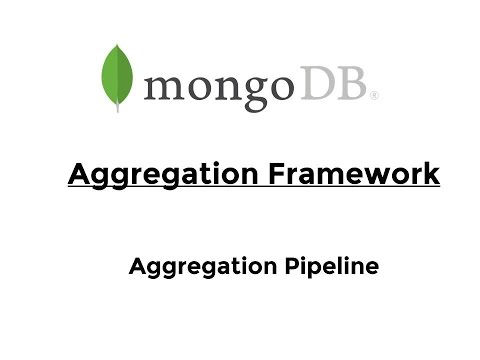

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo('VSX4a3h4SmQ',width=600)

![](https://miro.medium.com/max/1060/1*2lDBxvZ8Cr3JYkoODTa0lQ.png)

Proyección:

In [29]:
respuestas = db['posts'].aggregate( [
    {'$project' : { 'Id' : True }},
    {'$limit': 20} ])
list(respuestas)

[{'_id': ObjectId('6561db90686551f2e75c349e'), 'Id': 1},
 {'_id': ObjectId('6561db90686551f2e75c349f'), 'Id': 2},
 {'_id': ObjectId('6561db90686551f2e75c34a0'), 'Id': 3},
 {'_id': ObjectId('6561db90686551f2e75c34a1'), 'Id': 4},
 {'_id': ObjectId('6561db90686551f2e75c34a2'), 'Id': 5},
 {'_id': ObjectId('6561db90686551f2e75c34a3'), 'Id': 6},
 {'_id': ObjectId('6561db90686551f2e75c34a4'), 'Id': 7},
 {'_id': ObjectId('6561db90686551f2e75c34a5'), 'Id': 8},
 {'_id': ObjectId('6561db90686551f2e75c34a6'), 'Id': 9},
 {'_id': ObjectId('6561db90686551f2e75c34a7'), 'Id': 10},
 {'_id': ObjectId('6561db90686551f2e75c34a8'), 'Id': 11},
 {'_id': ObjectId('6561db90686551f2e75c34a9'), 'Id': 12},
 {'_id': ObjectId('6561db90686551f2e75c34aa'), 'Id': 14},
 {'_id': ObjectId('6561db90686551f2e75c34ab'), 'Id': 15},
 {'_id': ObjectId('6561db90686551f2e75c34ac'), 'Id': 16},
 {'_id': ObjectId('6561db90686551f2e75c34ad'), 'Id': 17},
 {'_id': ObjectId('6561db90686551f2e75c34ae'), 'Id': 18},
 {'_id': ObjectId('6561

_Lookup_!

In [30]:
respuestas = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        }
        ])
list(respuestas)

[{'_id': ObjectId('6561db90686551f2e75c34be'),
  'Id': 36,
  'AcceptedAnswerId': 40,
  'AnswerCount': 2,
  'Body': '<p>¿Cuál es la diferencia entre un <code>inner</code> y un <code>outer join</code>?</p><br/><br/><p>Y ¿cuál es la función de los modificadores <code>left</code>, <code>right</code> o <code>full</code>?</p><br/>',
  'ClosedDate': None,
  'CommentCount': 0,
  'CommunityOwnedDate': None,
  'CreationDate': datetime.datetime(2015, 11, 2, 15, 31, 51, 453000),
  'FavoriteCount': 14,
  'LastActivityDate': datetime.datetime(2017, 7, 27, 18, 24, 16, 747000),
  'LastEditDate': datetime.datetime(2017, 3, 4, 4, 23, 32, 177000),
  'LastEditorDisplayName': '',
  'LastEditorUserId': 29967,
  'OwnerDisplayName': '',
  'OwnerUserId': 21,
  'ParentId': '',
  'PostTypeId': 1,
  'Score': 54,
  'Tags': '<mysql><sql><join>',
  'Title': '¿Cuál es la diferencia entre un inner y un outer join?',
  'ViewCount': 6015,
  'owner': [{'_id': ObjectId('6561db95686551f2e75d5ea9'),
    'Id': 21,
    'About

El `$lookup` genera un _array_ con todos los resultados. El operador `$arrayElementAt` accede al primer elemento.

In [31]:
respuestas = db.posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$project' : {
            'Id' : True,
            'Score' : True,
            'username' : {'$arrayElemAt' : ['$owner.DisplayName', 0]},
            'owner.DisplayName' : True
          }}
        ])
list(respuestas)

[{'_id': ObjectId('6561db90686551f2e75c34be'),
  'Id': 36,
  'Score': 54,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('6561db90686551f2e75c34c2'),
  'Id': 40,
  'Score': 98,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('6561db90686551f2e75c34e5'),
  'Id': 94,
  'Score': 44,
  'owner': [{'DisplayName': 'Jcl'}],
  'username': 'Jcl'},
 {'_id': ObjectId('6561db90686551f2e75c3519'),
  'Id': 151,
  'Score': 47,
  'owner': [{'DisplayName': 'Hewbot'}],
  'username': 'Hewbot'},
 {'_id': ObjectId('6561db90686551f2e75c3542'),
  'Id': 197,
  'Score': 77,
  'owner': [{'DisplayName': 'Peter Olson'}],
  'username': 'Peter Olson'},
 {'_id': ObjectId('6561db90686551f2e75c3546'),
  'Id': 204,
  'Score': 106,
  'owner': [{'DisplayName': 'Konamiman'}],
  'username': 'Konamiman'},
 {'_id': ObjectId('6561db90686551f2e75c355a'),
  'Id': 225,
  'Score': 43,
  'owner': [{'DisplayName': 'Jordi Castilla'}],
  'username': 'Jo

`$unwind` también puede usarse. "Desdobla" cada fila por cada elemento del array. En este caso, como sabemos que el array sólo contiene un elemento, sólo habrá una fila por fila original, pero sin el _array_. Finalmente se puede proyectar el campo que se quiera.

In [32]:
respuestas = db.posts.aggregate( [
        { '$match': { 'Score' : {'$gte': 40}}},
        { '$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"
          }
        },
        { '$unwind': '$owner'},
        { '$project' : {
             'username': '$owner.DisplayName'
          }
        }
        ])
list(respuestas)

[{'_id': ObjectId('6561db90686551f2e75c34be'), 'username': 'jachguate'},
 {'_id': ObjectId('6561db90686551f2e75c34c2'), 'username': 'jachguate'},
 {'_id': ObjectId('6561db90686551f2e75c34e5'), 'username': 'Jcl'},
 {'_id': ObjectId('6561db90686551f2e75c3519'), 'username': 'Hewbot'},
 {'_id': ObjectId('6561db90686551f2e75c3542'), 'username': 'Peter Olson'},
 {'_id': ObjectId('6561db90686551f2e75c3546'), 'username': 'Konamiman'},
 {'_id': ObjectId('6561db90686551f2e75c355a'), 'username': 'Jordi Castilla'},
 {'_id': ObjectId('6561db90686551f2e75c355b'), 'username': 'Jordi Castilla'},
 {'_id': ObjectId('6561db90686551f2e75c35b9'), 'username': 'Jordi Castilla'},
 {'_id': ObjectId('6561db90686551f2e75c35fd'), 'username': 'Peter Olson'},
 {'_id': ObjectId('6561db90686551f2e75c5808'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('6561db90686551f2e75c6dcd'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('6561db90686551f2e75c6dce'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('6561db9

### Ejemplo de realización de la consulta RQ4

Como ejemplo de consulta compleja con el Framework de Agregación, adjunto una posible solución a la consulta RQ4:

In [33]:
RQ4 = db.posts.aggregate( [
        { "$match" : {"PostTypeId": 2}},
        { '$lookup': {
            'from': "posts",
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
          }
        },

        { '$unwind' : '$question' },

        { '$project' : {
            'OwnerUserId': True,
            'OP' : '$question.OwnerUserId'
          }
        },
        {
          '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$OP'] },
                               'max' : { '$max' : ['$OwnerUserId' , '$OP'] }},
                      'pairs' : {'$addToSet' : { '0q': '$OP', '1a': '$OwnerUserId'}}
          }
        },
        {
          '$project': {
            'pairs' : True,
            'npairs' : { '$size' : '$pairs'}
          }
        },
        {
          '$match' : { 'npairs' : { '$eq' : 2}}
        }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': {'min': 3275, 'max': ''},
  'pairs': [{'0q': '', '1a': 3275}, {'0q': 3275, '1a': ''}],
  'npairs': 2},
 {'_id': {'min': 729, 'max': 1798},
  'pairs': [{'0q': 729, '1a': 1798}, {'0q': 1798, '1a': 729}],
  'npairs': 2},
 {'_id': {'min': 535, 'max': 2230},
  'pairs': [{'0q': 535, '1a': 2230}, {'0q': 2230, '1a': 535}],
  'npairs': 2},
 {'_id': {'min': 250, 'max': 18597},
  'pairs': [{'0q': 18597, '1a': 250}, {'0q': 250, '1a': 18597}],
  'npairs': 2},
 {'_id': {'min': 16349, 'max': 25360},
  'pairs': [{'0q': 16349, '1a': 25360}, {'0q': 25360, '1a': 16349}],
  'npairs': 2},
 {'_id': {'min': 120, 'max': 531},
  'pairs': [{'0q': 531, '1a': 120}, {'0q': 120, '1a': 531}],
  'npairs': 2},
 {'_id': {'min': 13558, 'max': 13938},
  'pairs': [{'0q': 13558, '1a': 13938}, {'0q': 13938, '1a': 13558}],
  'npairs': 2},
 {'_id': {'min': 13883, 'max': 14699},
  'pairs': [{'0q': 13883, '1a': 14699}, {'0q': 14699, '1a': 13883}],
  'npairs': 2},
 {'_id': {'min': 250, 'max': 13558},
  'pairs': [{'0q': 

La explicación es como sigue:

1. Se eligen sólo las respuestas
2. Se accede a la tabla `posts` para recuperar los datos de la pregunta
3. A continuación se proyectan sólo el usuario que pregunta y el que hace la respuesta
4. El paso más imaginativo es el de agrupación. Lo que se intenta es que ambos pares de usuarios que están relacionados como preguntante -> respondiente y viceversa, caigan en la misma clave. Por ello, se coge el máximo y el mínimo de ambos identificadores de usuarios y se construye una clave con ambos números en las mismas posiciones. Así, ambas combinaciones de usuario que pregunta y que responde caerán en la misma clave. También se usa un conjunto (en `pairs`), y sólo se añadirá una vez las posibles combinaciones iguales de preguntador/respondiente.
5. Sólo nos interesan aquellas tuplas cuyo tamaño del conjunto de pares de pregunta/respuesta sea igual a dos (en un elemento uno de los dos usuarios habrá preguntado y el otro habrá respondido y en el otro viceversa).

La implementación en Map-Reduce se puede realizar con la misma idea.

En el caso de que queramos tener como referencia las preguntas y respuestas a las que se refiere la conversación, se puede añadir un campo más que guarde todas las preguntas junto con sus respuestas consideradas

In [34]:
RQ4 = db.posts.aggregate( [
        { '$match': { 'PostTypeId' : 2}},
        { '$lookup': {
            'from': "posts",
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
          }
        },

        { '$unwind' : '$question' },

        { '$project' : {
            'OwnerUserId': True,
            'QId' : '$question.Id',
            'AId' : '$Id',
            'OP' : '$question.OwnerUserId'
          }
        },
        {
          '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$OP'] },
                               'max' : { '$max' : ['$OwnerUserId' , '$OP'] }},
                      'pairs' : {'$addToSet' : { '0q':'$OP', '1a': '$OwnerUserId'}},
                      'considered_pairs' : { '$push' : {'QId' : '$QId', 'AId' : '$AId'}}
          }
        },
        { '$project': {
            'pairs' : True,
            'npairs' : { '$size' : '$pairs'},
            'considered_pairs' : True
          }
        },
        { '$match' : { 'npairs' : { '$eq' : 2}} }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': {'min': 21, 'max': 1184},
  'pairs': [{'0q': 21, '1a': 1184}, {'0q': 1184, '1a': 21}],
  'considered_pairs': [{'QId': 2615, 'AId': 2619}, {'QId': 36, 'AId': 47441}],
  'npairs': 2},
 {'_id': {'min': 227, 'max': 2004},
  'pairs': [{'0q': 227, '1a': 2004}, {'0q': 2004, '1a': 227}],
  'considered_pairs': [{'QId': 1493, 'AId': 1497},
   {'QId': 1630, 'AId': 1646},
   {'QId': 3168, 'AId': 3172},
   {'QId': 3194, 'AId': 3224}],
  'npairs': 2},
 {'_id': {'min': 24, 'max': 25},
  'pairs': [{'0q': 24, '1a': 25}, {'0q': 25, '1a': 24}],
  'considered_pairs': [{'QId': 5, 'AId': 7},
   {'QId': 29, 'AId': 30},
   {'QId': 540, 'AId': 543},
   {'QId': 803, 'AId': 809}],
  'npairs': 2},
 {'_id': {'min': 29967, 'max': 39259},
  'pairs': [{'0q': 39259, '1a': 29967}, {'0q': 29967, '1a': 39259}],
  'considered_pairs': [{'QId': 79849, 'AId': 79851},
   {'QId': 86574, 'AId': 86599}],
  'npairs': 2},
 {'_id': {'min': 73, 'max': 6497},
  'pairs': [{'0q': 6497, '1a': 73}, {'0q': 73, '1a': 6497}],
  'co

In [35]:
(db.posts.find_one({'Id': 238}), db.posts.find_one({'Id': 243}),
db.posts.find_one({'Id': 222}), db.posts.find_one({'Id': 223}))

({'_id': ObjectId('6561db90686551f2e75c3566'),
  'Id': 238,
  'AcceptedAnswerId': 243,
  'AnswerCount': 1,
  'Body': "<p>Estoy observando un mensaje de alerta (no es un error) <code>InsecurePlatformWarning</code> al ejecutar el comando <code>pip</code> en Linux:</p><br/><br/><pre><code>$ pip search reportlab<br/>/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:90:<br/>         InsecurePlatformWarning: A true SSLContext object is not available.<br/>         This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail.<br/>         For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.<br/>  InsecurePlatformWarning<br/>reportlab           - The ReportLab Toolkit<br/></code></pre><br/><br/><p>Tengo instalada la última versión de <code>pip</code>:</p><br/><br/><pre><code>$ pip show pip<br/>---<br/>Metadata-Version: 2.0<br/>Name: pip<br/>Version: 7.1.2<br/>S

### Ejemplo de consulta: Tiempo medio desde que se hace una pregunta hasta que se le da la primera respuesta

Veamos cómo calcular el tiempo medio desde que se hace una pregunta hasta que se le da la primera respuesta. No se considerarán pues las preguntas que no tienen respuesta, lo cual es razonable.

Esto sólo calcula el tiempo mínimo de cada pregunta a su respuesta. Después se añadirá el código que calcula la media final:

In [36]:
min_answer_time = db.posts.aggregate([
    { "$match" : {"PostTypeId" : 2} },
    { '$group' : {
        '_id' : '$ParentId',
        # 'answers' : { '$push' : {'Id' : "$Id", 'CreationDate' : "$CreationDate"}},
        'min' : {'$min' : "$CreationDate"}
      }
    },
    { "$lookup" : {
        'from': "posts",
        'localField': "_id",
        'foreignField': "Id",
        'as': "post"}
    },
    { "$unwind" : "$post"},
    { "$project" : {
        "_id" : True,
        "min" : True,
        #"post" : True,
        "diff" : {"$subtract" : ["$min", "$post.CreationDate"]}
      }
    },
    #    { "$sort" : {'_id' : 1} }
    #{
    #  "$group" :  {
    #    "_id" : None,
    #    "avg" : { "$avg" : "$diff"}
    #  }
    #}
])
min_answer_time = list(min_answer_time)
min_answer_time

[{'_id': 32319,
  'min': datetime.datetime(2016, 11, 7, 16, 36, 21, 930000),
  'diff': 514607},
 {'_id': 54916,
  'min': datetime.datetime(2017, 3, 13, 7, 42, 23, 137000),
  'diff': 0},
 {'_id': 56790,
  'min': datetime.datetime(2017, 3, 21, 13, 12, 34, 127000),
  'diff': 2216864},
 {'_id': 62059,
  'min': datetime.datetime(2017, 4, 10, 20, 31, 8, 860000),
  'diff': 907837},
 {'_id': 71698,
  'min': datetime.datetime(2017, 5, 21, 0, 43, 7, 570000),
  'diff': 1503647},
 {'_id': 81185,
  'min': datetime.datetime(2017, 6, 23, 22, 23, 43, 383000),
  'diff': 1163833},
 {'_id': 82556,
  'min': datetime.datetime(2017, 6, 29, 17, 42, 22, 307000),
  'diff': 3071950},
 {'_id': 40503,
  'min': datetime.datetime(2017, 2, 17, 20, 46, 28, 767000),
  'diff': 4966281697},
 {'_id': 75295,
  'min': datetime.datetime(2017, 6, 2, 9, 11, 19, 660000),
  'diff': 3700403},
 {'_id': 20086,
  'min': datetime.datetime(2016, 8, 10, 3, 42, 4, 983000),
  'diff': 6010440},
 {'_id': 92328,
  'min': datetime.datetime(

In [37]:
df = pd.json_normalize(min_answer_time)
df.index=df["_id"]
df

,_id,min,diff
_id,,,
32319,32319,2016-11-07 16:36:21.930,514607
54916,54916,2017-03-13 07:42:23.137,0
56790,56790,2017-03-21 13:12:34.127,2216864
62059,62059,2017-04-10 20:31:08.860,907837
71698,71698,2017-05-21 00:43:07.570,1503647
...,...,...,...
35979,35979,2016-11-26 17:42:02.027,89933977
50610,50610,2017-02-20 21:00:04.653,386156
13291,13291,2016-06-09 06:38:48.237,35486747


In [38]:
#df['diff'].plot(kind='bar')

La siguiente consulta sí calcula el mínimo:

In [39]:
avg_answer_time = db.posts.aggregate([
    { "$match" : {"PostTypeId" : 2} },
    { '$group' : {
        '_id' : '$ParentId',
        # 'answers' : { '$push' : {'Id' : "$Id", 'CreationDate' : "$CreationDate"}},
        'min' : {'$min' : "$CreationDate"}
      }
    },
    { "$lookup" : {
        'from': "posts",
        'localField': "_id",
        'foreignField': "Id",
        'as': "post"}
    },
    { "$unwind" : "$post"},
    { "$project" : {
        "_id" : True,
        "min" : True,
        #"post" : True,
        "diff" : {"$subtract" : ["$min", "$post.CreationDate"]}
      }
    },
    #    { "$sort" : {'_id' : 1} }
    {
      "$group" :  {
        "_id" : None,
        "avg" : { "$avg" : "$diff"}
      }
    }
])
avg_answer_time = list(avg_answer_time)
avg_answer_time

[{'_id': None, 'avg': 418295789.4568075}]

## EJERCICIO 1: Con Agregación, construir las colecciones que asocian un usuario con las preguntas que ha hecho de cada tag (dado como su ID de tag) y dado un ID de tag, qué usuarios han hecho preguntas de ese tag (E1).

In [40]:
db.posts.aggregate([
  { "$match": { "PostTypeId": 1 }},   # Solo preguntas
  {
    "$project": {
      "_id": 0,
      "userId": "$OwnerUserId",
      "questionId": "$Id",
      "tag": {
        "$map": { #Aplicamos para cada tag lo siguiente
          "input": { "$split": ["$Tags", "><"] }, #Dividimos por el caracter ><
          "as": "t",
          "in": {
            "$replaceAll": {
              "input": { "$replaceAll": { "input": "$$t", "find": "<", "replacement": "" } }, # Eliminar "<" y reemplazamos por ""
              "find": ">",
              "replacement": "" # Eliminar ">"
            }
          }
        }
      }
    }
  },
  {
    "$match": { "tag": { "$ne": "" } } # Filtrar tags vacíos
  },
  {
    "$match": { "userId": { "$ne": "" } } # Filtrar users vacíos

  },
  {
    "$lookup": {
      "from": "tags", # Nombre de la colección de tags
      "localField": "tag", # Campo a comparar en la colección actual (nombre del tag)
      "foreignField": "TagName", # Campo a comparar en la colección de tags (nombre del tag)
      "as": "tag_info" # Nombre del nuevo campo que contendrá la información del tag
    }
  },
  {
    "$unwind": "$tag_info" # Desenrollar el resultado del lookup para añadir una entrada por cada tag
  },
  {
    "$project": {
      "userId": 1,
      "questionId": 1,
      "tagId": "$tag_info.Id" # Obtener el ID del tag del resultado del lookup
    }
  },
  {
    # Etapa final para guardar los resultados en una nueva colección
    "$out": "userTag"
  }
])

In [41]:
e1 = db.userTag.aggregate([{

    "$match": {"userId" : 27229,
               "tagId" : 175
               }
    },{
    "$project": {
      "_id": 0,
      "userId": 1,
      "questionId": 1,
      "tagId": 1 # Obtener el ID del tag del resultado del lookup
    },

  }])
list(e1)

[{'userId': 27229, 'questionId': 43048, 'tagId': 175},
 {'userId': 27229, 'questionId': 44073, 'tagId': 175},
 {'userId': 27229, 'questionId': 46476, 'tagId': 175}]

In [42]:
findTag = db.userTag.aggregate([{
    "$match": {"tagId" : 24}
    },
    { '$group' : {
        '_id' : {"UserId" : '$userId'},
      }
    },
    {
    "$project": {
      "_id": 1
    }
  },
    ])

findTag = list(findTag)
findTag

[{'_id': {'UserId': 2975}},
 {'_id': {'UserId': 31262}},
 {'_id': {'UserId': 31978}},
 {'_id': {'UserId': 51645}},
 {'_id': {'UserId': 31256}},
 {'_id': {'UserId': 56197}},
 {'_id': {'UserId': 23267}},
 {'_id': {'UserId': 25322}},
 {'_id': {'UserId': 7141}},
 {'_id': {'UserId': 31478}},
 {'_id': {'UserId': 23836}},
 {'_id': {'UserId': 23275}},
 {'_id': {'UserId': 2670}},
 {'_id': {'UserId': 6795}},
 {'_id': {'UserId': 45016}},
 {'_id': {'UserId': 47197}},
 {'_id': {'UserId': 19393}},
 {'_id': {'UserId': 14433}},
 {'_id': {'UserId': 28892}},
 {'_id': {'UserId': 13327}},
 {'_id': {'UserId': 21561}},
 {'_id': {'UserId': 4020}},
 {'_id': {'UserId': 27997}},
 {'_id': {'UserId': 31881}},
 {'_id': {'UserId': 7490}},
 {'_id': {'UserId': 14619}},
 {'_id': {'UserId': 6360}},
 {'_id': {'UserId': 10685}},
 {'_id': {'UserId': 4924}},
 {'_id': {'UserId': 14113}},
 {'_id': {'UserId': 6296}},
 {'_id': {'UserId': 45742}},
 {'_id': {'UserId': 9770}},
 {'_id': {'UserId': 13735}},
 {'_id': {'UserId': 3875

In [43]:
len(findTag)

1233

## EJERCICIO 2: Con el Framework de Agregación, generar la colección `StackOverflowFacts` vista en la sesión 2 (E2).

In [44]:
db.posts.aggregate([
  {
   "$project": { #Escogemos los campos necesarios del post
      '_id': 0,
      'Type': "Post",
      'PostId': "$Id",
      'OwnerUserId': "$OwnerUserId",
      'EventType' : "$PostTypeId",
      'CreationDate': "$CreationDate",
      'PostParentId': "$ParentId",
      'AcceptedAnswerId': "$AcceptedAnswerId"
    }
  },
  {
    "$unionWith": { #Unimos la tabla users con los campos seleccionados a la anterior
      'coll': "users",
      'pipeline': [
        {
          "$project": {
            '_id': 0,
            'Type': "User",
            'UserId': "$Id",
            'CreationDate': "$CreationDate"
          }
        }
      ]
    }
  },
  {
    "$unionWith": {#Unimos la tabla votes con los campos seleccionados a la anterior
      'coll': "votes",
      'pipeline': [
        {
          "$project": {
            '_id': 0,
            'Type': "Vote",
            'EventId': "$Id",
            'CreationDate': "$CreationDate"
          }
        }
      ]
    }
  },
  {
    "$unionWith": { #Unimos la tabla comments con los campos seleccionados a la anterior
      'coll': "comments",
      'pipeline': [
        {
          "$project": {
            '_id': 0,
            'Type': "Comment",
            'EventId': "$Id",
            'CreationDate': "$CreationDate"
          }
        }
      ]
    }
  },
  {
    "$sort": { #Ordenamos por la fecha de creacion de manera creciente
      'CreationDate': 1
    }
  },
  {
    "$out": "StackOverflowFacts" # Guardar los resultados en una nueva colección
  }
]);

In [45]:
e2= db.StackOverflowFacts.aggregate([])
e2 = list(e2)
e2

[{'_id': ObjectId('6561dbc761e976148f1561b2'),
  'Type': 'User',
  'UserId': -1,
  'CreationDate': datetime.datetime(2015, 10, 26, 21, 36, 24, 767000)},
 {'_id': ObjectId('6561dbc761e976148f1561b3'),
  'Type': 'User',
  'UserId': 1,
  'CreationDate': datetime.datetime(2015, 10, 26, 22, 50, 12, 710000)},
 {'_id': ObjectId('6561dbc761e976148f1561b4'),
  'Type': 'User',
  'UserId': 2,
  'CreationDate': datetime.datetime(2015, 10, 26, 22, 51, 7, 7000)},
 {'_id': ObjectId('6561dbc761e976148f1561b5'),
  'Type': 'User',
  'UserId': 3,
  'CreationDate': datetime.datetime(2015, 10, 26, 22, 52, 12, 923000)},
 {'_id': ObjectId('6561dbc761e976148f1561b6'),
  'Type': 'User',
  'UserId': 4,
  'CreationDate': datetime.datetime(2015, 10, 26, 23, 18, 40, 547000)},
 {'_id': ObjectId('6561dbc761e976148f1561b7'),
  'Type': 'User',
  'UserId': 5,
  'CreationDate': datetime.datetime(2015, 10, 26, 23, 46, 20, 807000)},
 {'_id': ObjectId('6561dbc761e976148f1561b8'),
  'Type': 'User',
  'UserId': 6,
  'Creatio

In [46]:
len(e2)

414594

## EJERCICIO 3: Con Agregación implementar la consulta RQ3 de la sesión 2.

In [47]:
e3 = db.posts.aggregate([
        {"$group": {
            "_id": "$OwnerUserId", #Agrupamos por el id del usuario
            "TotalPosts": {"$sum": 1}, #Almacenamos el numero total de posts para ese usuario, si encuentra un fichero entonces sumamos 1
            "Respuestas": {"$sum": {"$cond": [{"$eq": ["$PostTypeId", 2]}, 1, 0]}}, #Almacenamos el numero total de respuestas.
        }},
    {
        "$project": {
            "_id": 0,
            "OwnerUserId": "$_id",
            "TotalPosts": "$TotalPosts",
            "Respuestas": "$Respuestas",
            "PorcentajeRespuestas": {"$multiply": [{"$divide": ["$Respuestas", "$TotalPosts"]}]} # Calculamos el porcentaje dividiendo Repuestas/TotalPost y multiplicando x 100
        }
    },
         {
        '$project': { #Clasificamos los datos según el rango al que pertenezcan
            'categoria': {
                '$switch': {
                    'branches': [
                        {'case': {'$eq': ['$PorcentajeRespuestas', 0]}, 'then': '0%'},
                        {'case': {'$and': [{'$gt': ['$PorcentajeRespuestas', 0.0]}, {'$lt': ['$PorcentajeRespuestas', 0.1]}]}, 'then': '1%-9%'},
                        {'case': {'$and': [{'$gte': ['$PorcentajeRespuestas', 0.1]}, {'$lt': ['$PorcentajeRespuestas', 0.2]}]}, 'then': '10%-19%'},
                        {'case': {'$and': [{'$gte': ['$PorcentajeRespuestas', 0.2]}, {'$lt': ['$PorcentajeRespuestas', 0.3]}]}, 'then': '20%-29%'},
                        {'case': {'$and': [{'$gte': ['$PorcentajeRespuestas', 0.3]}, {'$lt': ['$PorcentajeRespuestas', 0.4]}]}, 'then': '30%-39%'},
                        {'case': {'$and': [{'$gte': ['$PorcentajeRespuestas', 0.4]}, {'$lt': ['$PorcentajeRespuestas', 0.5]}]}, 'then': '40%-49%'},
                        {'case': {'$and': [{'$gte': ['$PorcentajeRespuestas', 0.5]}, {'$lt': ['$PorcentajeRespuestas', 0.6]}]}, 'then': '50%-59%'},
                        {'case': {'$and': [{'$gte': ['$PorcentajeRespuestas', 0.6]}, {'$lt': ['$PorcentajeRespuestas', 0.7]}]}, 'then': '60%-69%'},
                        {'case': {'$and': [{'$gte': ['$PorcentajeRespuestas', 0.7]}, {'$lt': ['$PorcentajeRespuestas', 0.8]}]}, 'then': '70%-79%'},
                        {'case': {'$and': [{'$gte': ['$PorcentajeRespuestas', 0.8]}, {'$lt': ['$PorcentajeRespuestas', 0.9]}]}, 'then': '80%-89%'},
                        {'case': {'$and': [{'$gte': ['$PorcentajeRespuestas', 0.9]}, {'$lt': ['$PorcentajeRespuestas', 1.0]}]}, 'then': '90%-99%'},
                        {'case': {'$eq': ['$PorcentajeRespuestas', 1]}, 'then': 'Todas'}
                    ],
                    'default': 'Unknown'
                }
            },
        }
         },
        {
            "$group": {
                "_id": "$categoria", #Agrupamos por la categoría y obtenemos la cantidad de usuarios perteneciente a cada categoría
                "users":{"$sum" : 1}
            }
        },


    {
        "$sort": { "_id": 1 } #Ordenamos por la categoría
    }
])


df = pd.json_normalize(e3)
df




,_id,users
0,0%,8244
1,1%-9%,125
2,10%-19%,265
3,20%-29%,377
4,30%-39%,376
5,40%-49%,120
6,50%-59%,776
7,60%-69%,230
8,70%-79%,154
9,80%-89%,164


Text(0.5, 1.0, 'Porcentaje de usuarios que responden las preguntas')

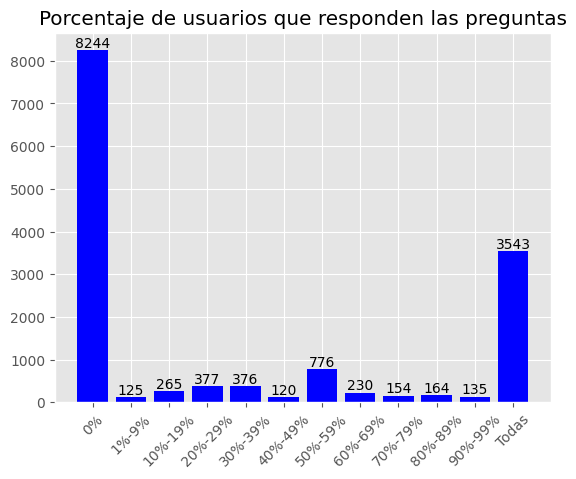

In [48]:
import matplotlib.pyplot as plt
_ids = df['_id']
users = df['users']
bars = plt.bar(range(len(_ids)), users, color='blue')

# Añadir el valor encima de cada barra
for bar, value in zip(bars, users):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xticks(range(len(df["_id"])), df["_id"], rotation=45)
plt.title("Porcentaje de usuarios que responden las preguntas")


## EJERCICIO 4: Con Agregación, calcular, en la tabla `StackOverflowFacts` la media de tiempo que pasa desde que los usuarios se registran hasta que publican su primera pregunta.

In [49]:
db.StackOverflowFacts.create_index([('UserId',pymongo.HASHED)])

'UserId_hashed'

In [50]:
avgUserPost= db.StackOverflowFacts.aggregate([
  {
    "$match": {
      "Type": "Post",
      "EventType":1,# Filtrar por 'Post' de tipo pregunta
      "OwnerUserId": { "$ne": "" } # Asegurarse de que OwnerUserId no esté vacío
    }
  },
  {
    "$group": {
      "_id": "$OwnerUserId",
      "firstQuestion": { "$first": "$_id" }, # Obtener la primera pregunta por usuario
      "firstPostDate": { "$first": "$CreationDate" } # Obtener la fecha de la primera pregunta
    }
  },
  {
    "$project": {
      "_id": 0,
      "OwnerUserId": "$_id",
      "firstPostDate": 1
    }
  },
   {
    "$lookup": {
      "from": "StackOverflowFacts", # Nombre de la colección
      "localField": "OwnerUserId", # Campo a comparar en la colección actual (Id del Owner)
      "foreignField": "UserId", # Campo a comparar en la colección de Users (Id del User)
      "as": "user_info" # Nombre del nuevo campo que contendrá la información del user
  }
   },
 {
    "$group": {
        "_id": None,
        "AvgTime": {
            "$avg": {
                "$subtract": ["$firstPostDate", {"$arrayElemAt": ["$user_info.CreationDate", 0]}]
            }
        }
    }
}

])

avgUserPost = list(avgUserPost)
avgUserPost

[{'_id': None, 'AvgTime': 1536940004.8161623}]

## EJERCICIO 4: Con Agregación, calcular, en la tabla `StackOverflowFacts` la media de tiempo que pasa desde que se hace una pregunta hasta que se recibe la primera respuesta (ignorar las preguntas sin respuesta), y también desde la pregunta hasta la respuesta aceptada (de nuevo, si no tiene respuesta aceptada, se ignora esa pregunta)

In [51]:
db.StackOverflowFacts.create_index([('PostId',pymongo.HASHED)])

'PostId_hashed'

In [52]:
avgTimePostAnswer= db.StackOverflowFacts.aggregate([
         {
    "$match": {
      "Type": "Post",
      "EventType": 2,# Filtrar por 'Post' de tipo respuesta
      "PostParentId": { "$ne": "" } # Asegurarse de que PostParentId no esté vacío
    }
  },
  {
    "$group": {
      "_id": "$PostParentId",
      "firstAnswerDate": { "$first": "$CreationDate" } # Obtener la fecha de la primera respuesta
    }
  },
  {
    "$lookup": {
      "from": "StackOverflowFacts", # Nombre de la colección
      "localField": "_id", # Campo a comparar en la colección actual (Id del PostParent)
      "foreignField": "PostId", # Campo a comparar en la colección de Post (Id del Post)
      "as": "post_info" # Nombre del nuevo campo que contendrá la información del post
  }
   },
  {
      "$group":{
        "_id":None,
        "AvgTime": {"$avg": {"$subtract":["$firstAnswerDate", {"$arrayElemAt": ["$post_info.CreationDate", 0]}]}} # Calcular la media del tiempo entre la primera respuesta y la pregunta
      }
  }

])
avgTimePostAnswer=list(avgTimePostAnswer)
avgTimePostAnswer

[{'_id': None, 'AvgTime': 418295789.4568075}]

In [53]:
avgTimePostAnswer= db.StackOverflowFacts.aggregate([
       {
        "$match": {
            "Type": "Post",
            "AcceptedAnswerId": {"$ne": ""} #Filtamos por los posts y nos aseguramos que tenga una respuesta aceptada
        }
    },
    {
        "$lookup": {
            "from": "StackOverflowFacts", #Accedemos a la tabla StackOverflowFacts
            "localField": "AcceptedAnswerId", # Indicamos que la clave de nuestra tabla es AcceptedAnswer
            "foreignField": "PostId", # Indicamos que la clave de la tabla foreign es PostId
            "as": "acceptedAnswer_info" #Lo guardamos en acceptedAnswer
        }
    },
 {
        "$group": {
            "_id": None,
            "AvgTime": {"$avg": {"$subtract": [{"$arrayElemAt": ["$acceptedAnswer_info.CreationDate", 0]}, "$CreationDate"]}} #Calculamos la media entre la pregunta y la respuesta aceptada en milisegundos
        }
    }

])
avgTimePostAnswer=list(avgTimePostAnswer)
avgTimePostAnswer

[{'_id': None, 'AvgTime': 219768679.53098667}]